In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Read the dataset

In [3]:
df1=pd.read_excel(r"C:\Users\rjbs1\Downloads\mxmh_survey_results (1) (2).xlsx")

In [4]:
df1.head(20)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,...,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Yes,Yes,156.0,...,0,0,1,0,0,0,0,0,0,0
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Yes,No,119.0,...,0,0,0,0,0,0,0,0,1,0
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,No,Yes,132.0,...,0,0,0,0,0,0,0,0,0,1
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Yes,Yes,84.0,...,1,0,0,0,0,0,0,0,0,0
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,Yes,No,107.0,...,0,0,0,0,0,0,1,0,0,0
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Yes,Yes,86.0,...,1,0,0,0,0,0,0,0,0,0
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Yes,Yes,66.0,...,0,0,0,0,0,0,0,0,0,1
7,2022-08-27 22:18:59,21.0,Spotify,1.0,Yes,No,No,Yes,Yes,95.0,...,0,1,0,0,0,0,0,0,0,0
8,2022-08-27 22:33:05,19.0,Spotify,6.0,Yes,No,No,No,No,94.0,...,0,0,0,0,0,0,0,0,1,0
9,2022-08-27 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,Yes,Yes,155.0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Exploratory                   736 non-null    object        
 8   Foreign languages             732 non-null    object        
 9   BPM                           629 non-null    float64       
 10  Frequency [Classical]         736 non-null    object        
 11  Frequency [Country]           73

In [6]:
df1.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Fav genre_Country', 'Fav genre_EDM', 'Fav genre_Folk',
       'Fav genre_Gospel', 'Fav genre_Hip hop', 'Fav genre_Jazz',
       'Fav genre_K pop', 'Fav genre_Latin', 'Fav genre_Lofi',
       'Fav genre_Metal', 'Fav genre_Pop', 'Fav genre_R&B', 'Fav genre_Rap',
       'Fav genre_Rock', 'Fav genre_Video game music'],
      dtype='object')

# EDA

C:\Users\rjbs1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


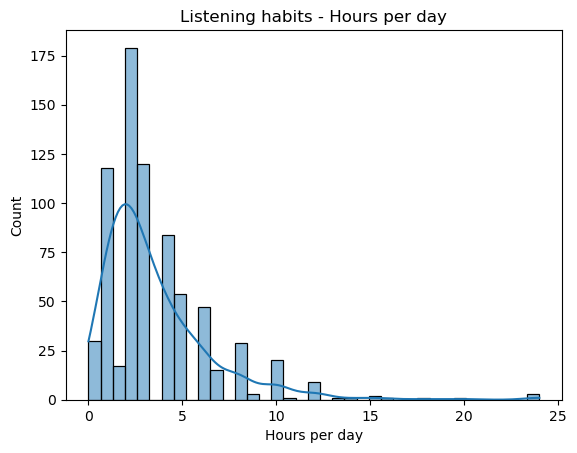

In [7]:
df1.columns = df1.columns.str.strip()

# Ensure 'Hours per day' is a column in your DataFrame
if 'Hours per day' in df1.columns:
    sns.histplot(data=df1, x='Hours per day', kde=True)
    plt.title('Listening habits - Hours per day')
    plt.show()

C:\Users\rjbs1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


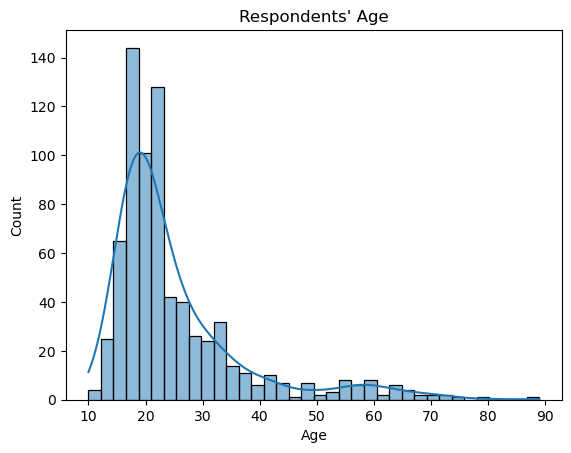

In [8]:
df1.columns = df1.columns.str.strip()

# Ensure 'Hours per day' is a column in your DataFrame
if 'Age' in df1.columns:
    sns.histplot(data=df1, x='Age', kde=True)
    plt.title("Respondents' Age")
    plt.show()

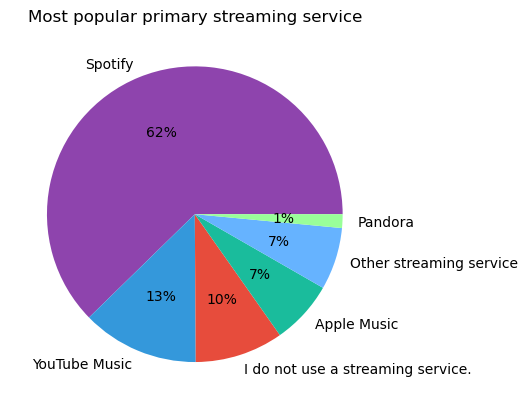

In [9]:
df_streaming_servies = df1['Primary streaming service'].value_counts().reset_index()
palette_color = ['#8e44ad', '#3498db', '#e74c3c', '#1abc9c','#66b3ff','#99ff99']
plt.pie(df_streaming_servies['count'], labels=df_streaming_servies['Primary streaming service'], colors= palette_color, autopct='%.0f%%')
plt.title('Most popular primary streaming service')
plt.show() 

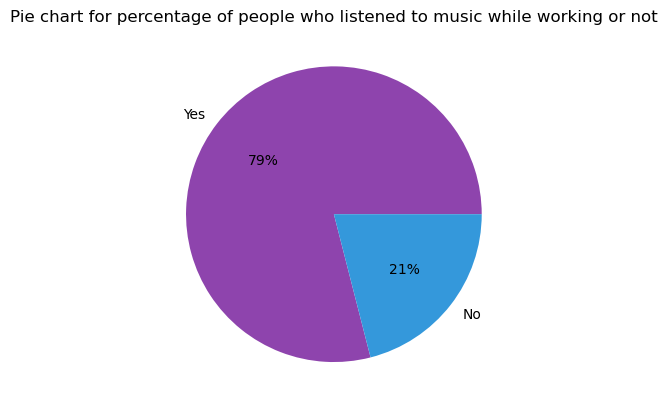

In [14]:
df_while_working = df1['While working'].value_counts().reset_index()
plt.pie(df_while_working['count'], labels=df_while_working['While working'],colors= palette_color, autopct='%.0f%%')
plt.title("Pie chart for percentage of people who listened to music while working or not")
plt.show()

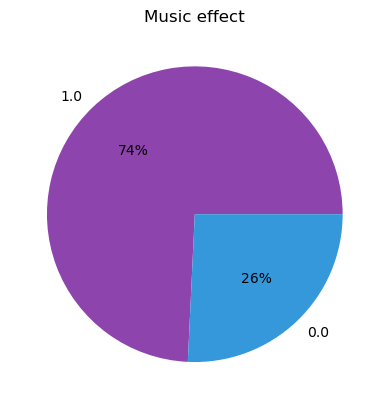

In [15]:
#1.0 represents improve and 0.0 represents worsen or no effect
df_music_effect = df1['Music effects'].value_counts().reset_index()
plt.pie(df_music_effect['count'], labels=df_music_effect['Music effects'],colors= palette_color, autopct='%.0f%%')
plt.title("Music effect")
plt.show()

# Assign columns to X and Y

In [16]:
y = df1['Music effects']
one_hot_encoded_genres_columns = df1.filter(like='Fav genre_').columns
X = df1[[ 'Anxiety', 'Depression', 'Insomnia', 'OCD'] + list(one_hot_encoded_genres_columns)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train, y_train

(     Anxiety  Depression  Insomnia  OCD  Fav genre_Country  Fav genre_EDM  \
 135        1           0         1    1                  0              0   
 545        1           0         0    0                  0              0   
 497        1           1         0    0                  0              0   
 340        0           1         0    0                  0              0   
 165        1           0         0    0                  0              0   
 ..       ...         ...       ...  ...                ...            ...   
 71         1           0         0    1                  0              0   
 106        1           1         1    0                  0              0   
 270        0           0         0    1                  0              0   
 435        1           1         1    1                  0              0   
 102        1           1         1    1                  0              0   
 
      Fav genre_Folk  Fav genre_Gospel  Fav genre_Hip hop  Fav

In [73]:
non_null_indices = ~np.isnan(y_train)

# Use the non-null indices to filter X_train and y_train
X_train = X_train[non_null_indices]
y_train = y_train[non_null_indices]

# Training and evaluating classifiers

In [74]:
y_train = np.nan_to_num(y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
results={}
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
for name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    print(f"Confusion matrix for {name}: \n",cm)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f"{name} Accuracy:{accuracy*100:.2f}%")
    print(classification_report(y_test,y_pred))
    print("..........................................................................")

Confusion matrix for Logistic Regression: 
 [[  0  35]
 [  0 113]]
Logistic Regression Accuracy:76.35%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.76      1.00      0.87       113

    accuracy                           0.76       148
   macro avg       0.38      0.50      0.43       148
weighted avg       0.58      0.76      0.66       148

..........................................................................
Confusion matrix for Decision Tree: 
 [[  7  28]
 [  9 104]]
Decision Tree Accuracy:75.00%
              precision    recall  f1-score   support

         0.0       0.44      0.20      0.27        35
         1.0       0.79      0.92      0.85       113

    accuracy                           0.75       148
   macro avg       0.61      0.56      0.56       148
weighted avg       0.71      0.75      0.71       148

..........................................................................
Co

C:\Users\rjbs1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjbs1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjbs1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for Support Vector Machine: 
 [[  1  34]
 [  0 113]]
Support Vector Machine Accuracy:77.03%
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        35
         1.0       0.77      1.00      0.87       113

    accuracy                           0.77       148
   macro avg       0.88      0.51      0.46       148
weighted avg       0.82      0.77      0.68       148

..........................................................................
Confusion matrix for K-Nearest Neighbors: 
 [[  6  29]
 [ 12 101]]
K-Nearest Neighbors Accuracy:72.30%
              precision    recall  f1-score   support

         0.0       0.33      0.17      0.23        35
         1.0       0.78      0.89      0.83       113

    accuracy                           0.72       148
   macro avg       0.56      0.53      0.53       148
weighted avg       0.67      0.72      0.69       148

...........................................................

In [75]:
model = DecisionTreeClassifier(random_state=42)

In [76]:
y_train

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

# Training the model using logistic regression

In [100]:
model1=LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Optimising the Logistic Regression model 

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Solver to use
    'max_iter': [100, 200, 500, 1000]  # Number of iterations
}
grid_search = GridSearchCV(
    estimator=model1,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # You can also use 'f1', 'precision', 'recall', etc.
    n_jobs=-1  # Use all available cores
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [104]:
print("best parameters:",best_params)
print("best score:",best_score)
best_model=grid_search.best_estimator_
print("best model:",best_model)

best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
best score: 0.7371205422929561
best model: LogisticRegression(C=0.001, penalty='l1', solver='saga')


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred=best_model.predict(X_test)


In [107]:
precision=precision_score(y_test, y_pred, average='weighted', zero_division=0)
precision

0.5829528853177501

In [108]:
f1score=f1_score(y_test, y_pred, average='weighted')
f1score

0.6611266438852645

In [109]:
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score*100

76.35135135135135

# Training the model using Decision tree 

In [110]:

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
y_pred = model.predict(X_test)

In [112]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.75


# Optimising the model using Hyperparameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy}")

Optimized Accuracy: 0.7635135135135135


In [115]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.69230769 0.73504274 0.68965517 0.73275862 0.72413793]
Average Cross-Validation Score: 0.7147804302976717


In [116]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.703952239911144

In [117]:
f1=f1_score(y_test,y_pred,average='weighted')

In [118]:
f1

0.6731190650109569

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
dt_model = DecisionTreeClassifier(random_state=42)

# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [121]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [122]:
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.777027027027027
              precision    recall  f1-score   support

         0.0       1.00      0.06      0.11        35
         1.0       0.77      1.00      0.87       113

    accuracy                           0.78       148
   macro avg       0.89      0.53      0.49       148
weighted avg       0.83      0.78      0.69       148

[[  2  33]
 [  0 113]]


In [123]:
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.73504274 0.70940171 0.73275862 0.74137931 0.75      ]
Average Cross-Validation Score: 0.7337164750957855


In [124]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.777027027027027

In [125]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8274250277674935

In [126]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.6917979755817594

# Optimising the model using Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf}")

Random Forest Test Accuracy: 0.777027027027027


In [128]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8274250277674935

In [129]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.6917979755817594

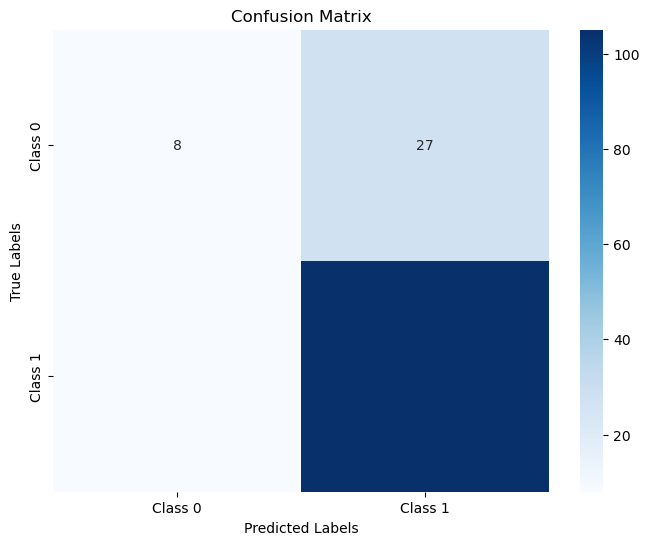

In [139]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],  # Adjust class labels as needed
            yticklabels=['Class 0', 'Class 1'])  # Adjust class labels as needed
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()